In [1]:
%run ./basic-neural-network.ipynb
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [3]:
# set to None to use the entire dataset
N_SAMPLES = 10000
# set to None for irreproducible results
RANDOM_SEED = 1

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X, y = np.concatenate((X_train, X_test), axis=0), np.concatenate((y_train, y_test), axis=0)

# shuffle the dataset, then truncate it
X, y = shuffle(X, y, random_state=RANDOM_SEED)
X, y = X[:N_SAMPLES], y[:N_SAMPLES]

# normalize the images values
X = X / 255
# turn every non white pixels to full black pixels
# NOT RECOMMENDED, may decrease generalization
#X[X.nonzero()] = 1
# flatten each 28 * 28 square image into a 784 elements sequence
X = X.reshape(len(X), 28 * 28)
# transform each label in its respective one hot representation
# eg: 0 -> [1 0 0 0 0 0 0 0 0 0], 4 -> [0 0 0 0 1 0 0 0 0 0]
y = np.array([np.eye(10)[label] for label in y])

train_samples, test_samples, train_labels, test_labels = train_test_split(X, y, random_state=RANDOM_SEED)

In [5]:
hidden_layer_size = 128
iterations = 100 + 1
learning_rate = 1e-3
batch_size = 512  # set to 1 for stochastic gradient descent
hid_activation = Activation.RELU
out_activation = Activation.SOFTMAX
dropout = 0.5
input_as_boolean = True
skip_remaining = True
random_seed = RANDOM_SEED

model = BasicNeuralNetwork(hidden_layer_size, learning_rate=learning_rate, epochs=iterations,
                           batch_size=batch_size, skip_remaining=skip_remaining,
                           hid_activation=hid_activation, out_activation=out_activation, 
                           dropout=dropout, input_as_boolean=input_as_boolean,
                           is_generator=True, random_seed=random_seed)

results = []
for _ in tqdm(model.fit(train_samples, train_labels), total=iterations):
    train_loss, train_accuracy = model.evaluate(train_samples, train_labels)
    test_loss, test_accuracy = model.evaluate(test_samples, test_labels)
    results.append({'Train Loss (MSE)': train_loss, 'Train Accuracy': train_accuracy,
                    'Test Loss (MSE)': test_loss, 'Test Accuracy': test_accuracy})

df = pd.DataFrame(results)
df.index += 1
df[['Train Loss (MSE)', 'Train Accuracy', 'Test Loss (MSE)', 'Test Accuracy']][::10].style \
        .highlight_min(subset=['Train Accuracy', 'Test Accuracy'], color="lightcoral") \
        .highlight_max(subset=['Train Accuracy', 'Test Accuracy'], color="lightgreen") \
        .highlight_min(subset=['Train Loss (MSE)', 'Test Loss (MSE)'], color="lightgreen") \
        .highlight_max(subset=['Train Loss (MSE)', 'Test Loss (MSE)'], color="lightcoral")

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:27<00:00,  3.64it/s]


,Train Loss (MSE),Train Accuracy,Test Loss (MSE),Test Accuracy
1,0.367967,0.807067,0.377593,0.795200
11,0.114152,0.926400,0.149091,0.901200
21,0.078946,0.950667,0.124836,0.914000
31,0.057700,0.964533,0.115146,0.922000
41,0.043452,0.974400,0.109213,0.926000
51,0.033926,0.980000,0.103977,0.929200
61,0.026973,0.984800,0.101069,0.930000
71,0.021480,0.987867,0.099026,0.934000
81,0.018135,0.989600,0.097275,0.932400
91,0.014406,0.992267,0.099020,0.935600


Sample 2425 correctly predicted to be a 0 with 99.99% probability (true label: 0)
Probability of 0: 99.99%
Probability of 7: 0.00%
Probability of 6: 0.00%
Probability of 2: 0.00%
Probability of 5: 0.00%
Probability of 3: 0.00%
Probability of 8: 0.00%
Probability of 9: 0.00%
Probability of 1: 0.00%
Probability of 4: 0.00%


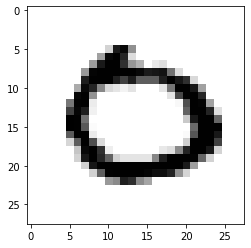

In [6]:
# picks a random sample and displays it along with its predicted and true labels
n_sample = np.random.randint(len(test_samples))
sample_pred = model.predict(np.array([test_samples[n_sample]]), normalize=True).flatten()
sample_label = test_labels[n_sample]
pred_label, true_label = np.argmax(sample_pred), np.argmax(sample_label)

print(f"Sample {n_sample} {'correctly' if pred_label == true_label else 'incorrectly'} \
predicted to be a {pred_label} with {(sample_pred[pred_label] * 100):.2f}% probability (true label: {true_label})")

sorted_probs = sorted(enumerate(sample_pred), key=lambda prob: prob[1], reverse=True)
for digit, prob in sorted_probs:
    print(f"Probability of {digit}: {(prob * 100):.2f}%")

plt.imshow(test_samples[n_sample].reshape(28, 28), cmap=plt.cm.binary)